In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [47]:
def generate_3d_plot(dataFrame, col1, col2, col3, heading, color):
    sub_df = dataFrame[[col1,col2, col3]].dropna()
    sub_df[col1] = sub_df[col1].map(lambda x: 5*(x//5))
    sub_df[col2] = sub_df[col2].map(lambda x: 10*(x//10))

    dictionnaire = sub_df.groupby([col2, col1])[col3].count().to_dict()

    def get_count(i, j, dictionnaire):
        if (i,j) in list(dictionnaire.keys()):
            # (i,j) is a key
            return dictionnaire[(i,j)]
        else:
            return 0

    from mpl_toolkits.mplot3d import Axes3D

    # setup the figure and axes
    fig = plt.figure(figsize=(20, 20))

    ax = fig.add_subplot(111, projection='3d')
    _x = np.array([i[0] for i in list(dictionnaire.keys())])
    _y = np.array([i[1] for i in list(dictionnaire.keys())])

    np.random.shuffle(_x)
    np.random.shuffle(_y)

    _x = _x[:40]
    _y = _y[:40]

    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = np.array([get_count(i, j, dictionnaire) for i, j in zip(x, y)])
    bottom = np.zeros_like(top)
    width = 3
    depth = 1 # 1..5 wider 3D vars
    
    ax.bar3d(x, y, bottom, width, depth, top, alpha=0.3, color=color)

    ax.set_title('3D Plot ' + heading + ' = f(' + col2 + ', ' +  col1 +' )')
    ax.set_xlabel(col2)
    ax.set_ylabel(col1)
    ax.set_zlabel(col3)
    
    #     ax.view_init(0, 0)
    # ax.view_init(azim=0, elev=90) # View from the Top

    
    plt.show()

In [48]:
remote_url = "https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/supermarket_sales.csv"
dfs = pd.read_csv(remote_url)
dfs

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


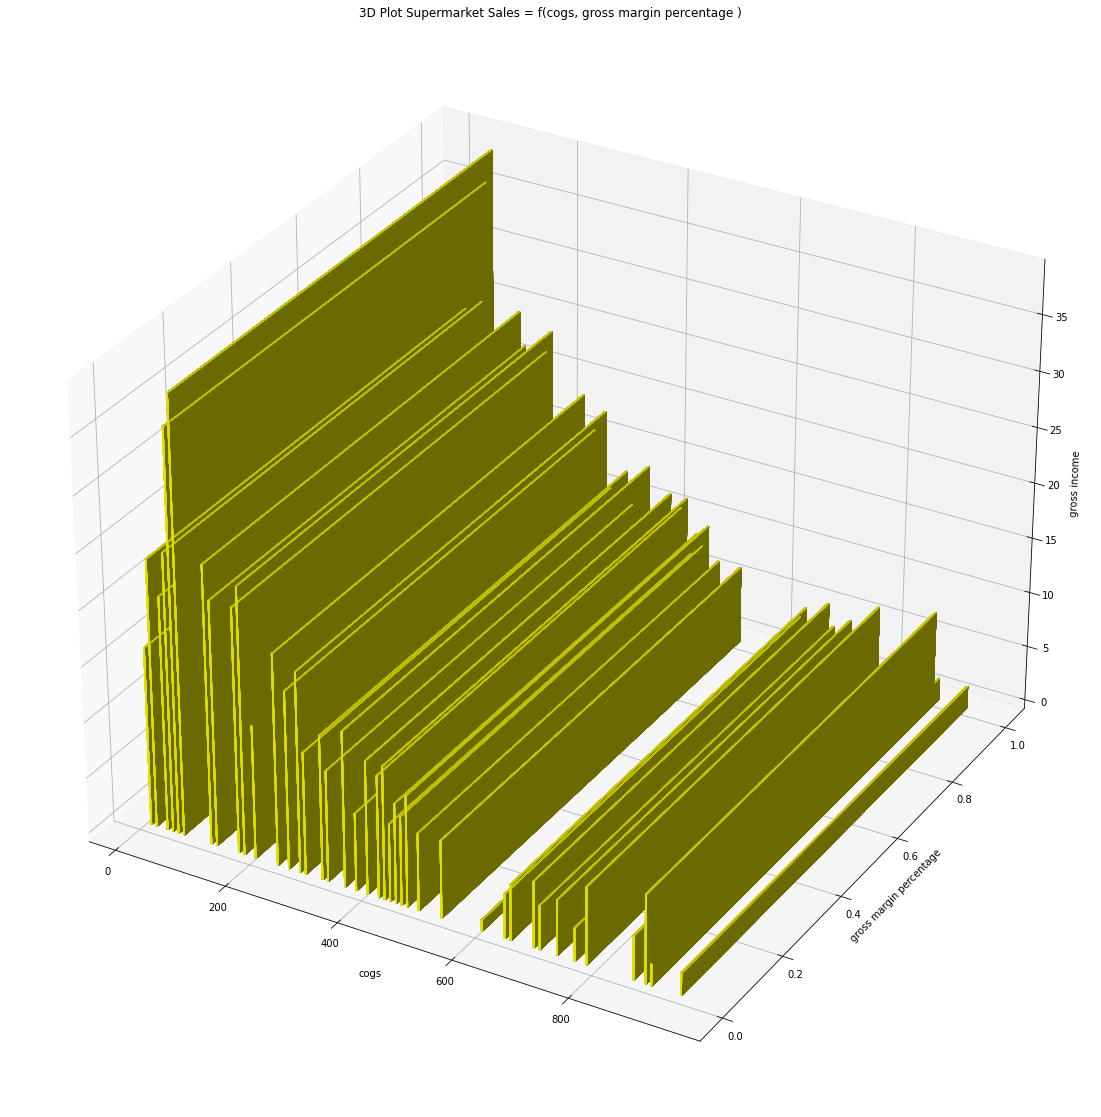

In [49]:
generate_3d_plot(dfs, 'gross margin percentage', 'cogs', 'gross income', 'Supermarket Sales', 'yellow')

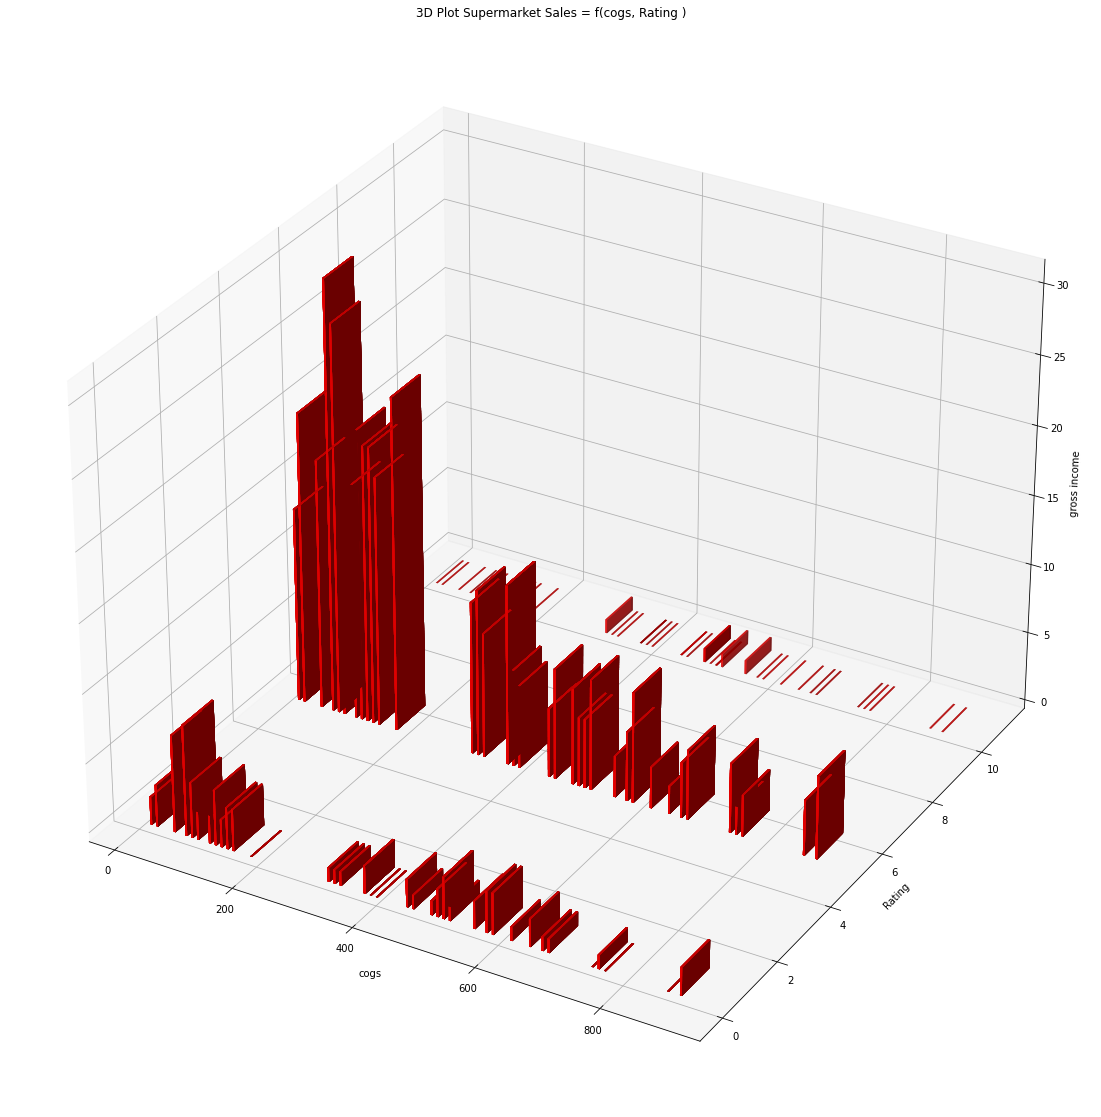

In [50]:
generate_3d_plot(dfs, 'Rating', 'cogs', 'gross income', 'Supermarket Sales', 'red')

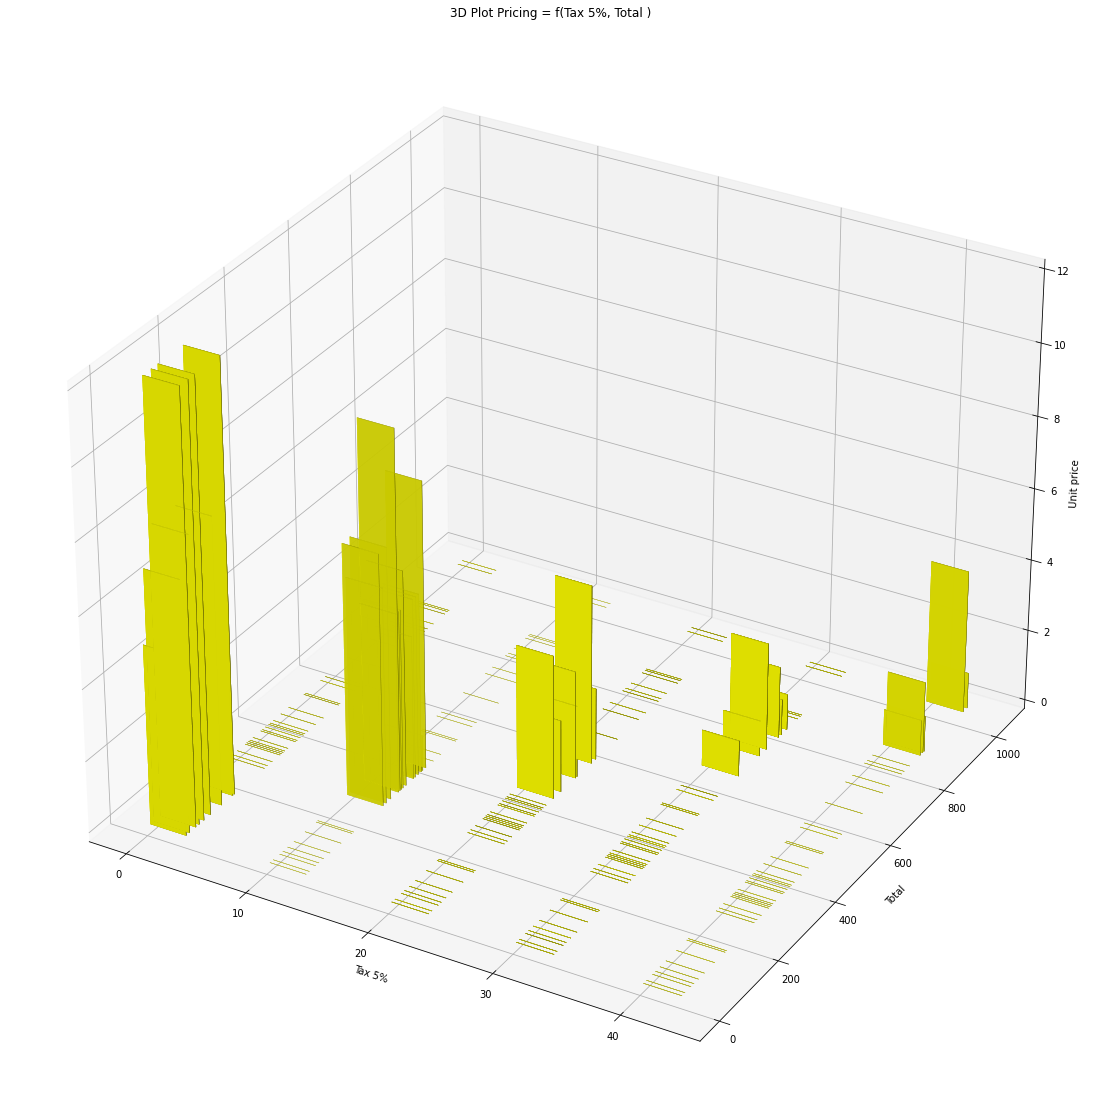

In [51]:
generate_3d_plot(dfs, 'Total', 'Tax 5%', 'Unit price', 'Pricing', 'yellow')

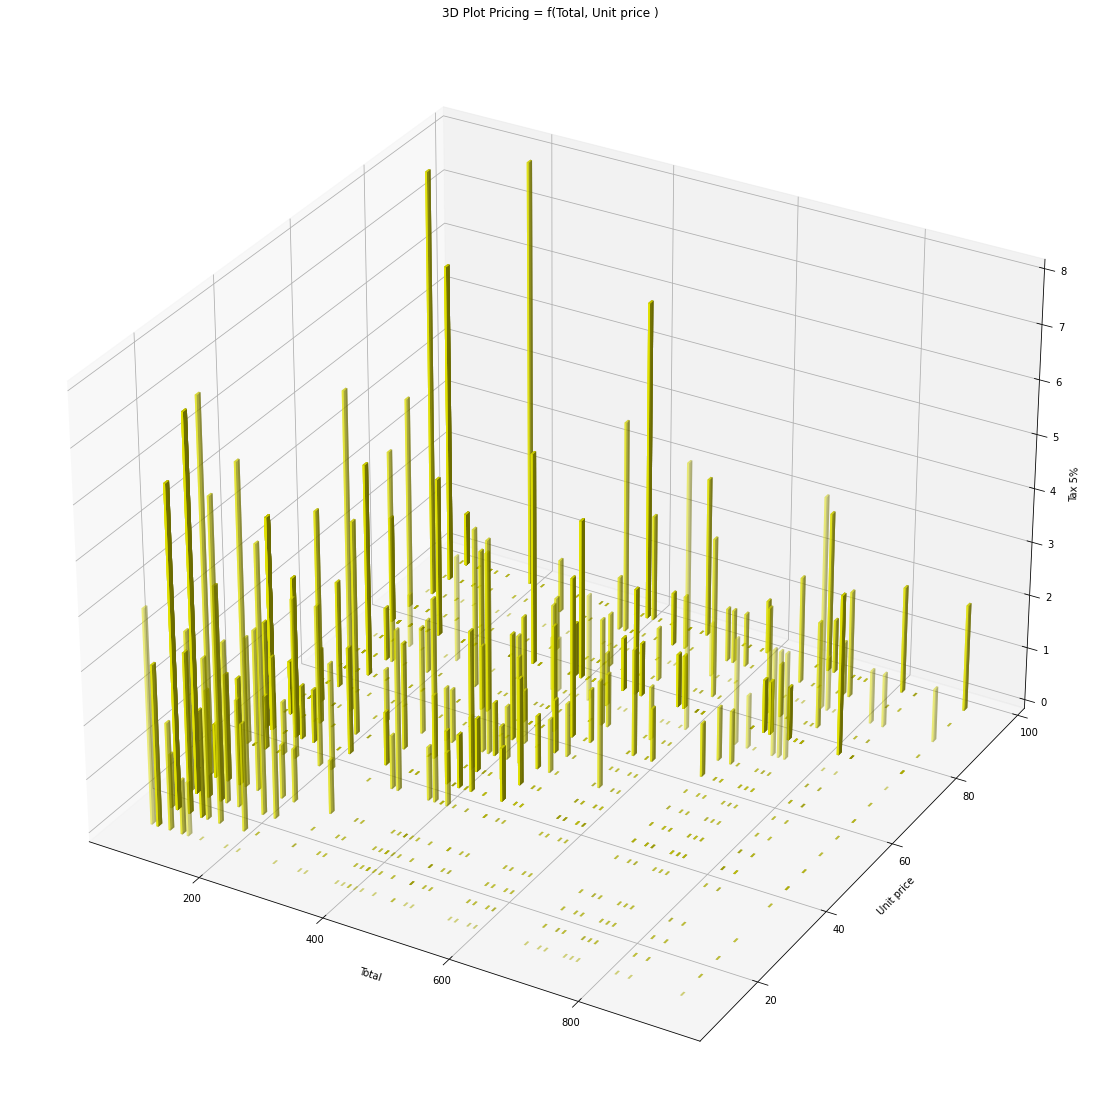

In [52]:
generate_3d_plot(dfs,'Unit price', 'Total', 'Tax 5%',  'Pricing', 'yellow')